# Event sequence analysis

In this workbook, we transform event sequences to natural language like sequences in order to apply NLP/word analysis techniques to derive clusters of events that appears together.

**Installing required libraries.**

In [ ]:
# Install pyLDAvis library for interactive event group visualization dashboard.
!pip install pyLDAvis

Load libraries.

In [ ]:
# Loading primary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer

# For interactive dashboard
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


## Load data

In [2]:
df_orig = pd.read_csv('dt_event_seq_10000_5_1_k20.csv')

In [3]:
# display the column names of the datasets
df_orig.columns

Index(['event_seq', 'occurrence_count', 'unique_users', 'mean_seq_time',
       'seq_length', 'ID', 'cluster_id', 'pca_x1', 'pca_x2', 'event_seq_cont'],
      dtype='object')

In [4]:
df_orig.head()

,event_seq,occurrence_count,unique_users,mean_seq_time,seq_length,ID,cluster_id,pca_x1,pca_x2,event_seq_cont
0,servicedesk.page.view.queue#-#servicedesk.page...,9,6,1,3,0,2,-0.081649,-0.153496,"['servicedesk.page.view.queue', 'servicedesk.p..."
1,experiments.performance.inclusion#-#dashboardview,1002,153,34,2,1,2,-0.080295,-0.159585,"['experiments.performance.inclusion', 'dashboa..."
2,jira.header.menu.opened#-#jira.header.menu.closed,257,96,1701,2,2,17,-0.086909,-0.170163,"['jira.header.menu.opened', 'jira.header.menu...."
3,kickass.criteriaAutoUpdateEnabled#-#kickass.vi...,1941,211,4658,4,3,0,0.491255,0.036603,"['kickass.criteriaAutoUpdateEnabled', 'kickass..."
4,kickass.criteriaAutoUpdateEnabled#-#browserWin...,131,44,5548,5,4,3,-0.023842,0.459916,"['kickass.criteriaAutoUpdateEnabled', 'browser..."


In [5]:
cluster_events = {}

for i in range(0, max(df_orig['cluster_id'])+1):

  df_c1 = df_orig.loc[df_orig['cluster_id']==i]

  c1_events = []
  for index, row in df_c1.iterrows():
    c1_events.extend(row['event_seq_cont'])

  c1_events = list(set(c1_events))
  c1_events.sort()
  cluster_events[i] = c1_events

In [6]:
for i in range(0, max(df_orig['cluster_id'])+1):
  print(i, '-', len(cluster_events[i]))

0 - 44
1 - 46
2 - 51
3 - 43
4 - 40
5 - 44
6 - 38
7 - 39
8 - 45
9 - 40
10 - 45
11 - 42
12 - 38
13 - 41
14 - 42
15 - 38
16 - 43
17 - 37
18 - 36
19 - 43


## Preprocessing

In [7]:
cluster_id = 0

In [8]:
# Create a copy of original data
df = df_orig.copy()
df = df_orig.loc[df_orig['cluster_id']==cluster_id]

In [ ]:
df['content'] = df['event_seq'].str.replace('#-#',' ')
df['content'] = df['content'].str.replace('.','_')
df['content'] = df['content'].str.replace('-','_')

In [10]:
df.head()

,event_seq,occurrence_count,unique_users,mean_seq_time,seq_length,ID,cluster_id,pca_x1,pca_x2,event_seq_cont,content
3,kickass.criteriaAutoUpdateEnabled#-#kickass.vi...,1941,211,4658,4,3,0,0.491255,0.036603,"['kickass.criteriaAutoUpdateEnabled', 'kickass...",kickass_criteriaAutoUpdateEnabled kickass_view...
29,kickass.criteriaAutoUpdateEnabled#-#kickass.vi...,15,11,7782,5,29,0,0.495853,0.037728,"['kickass.criteriaAutoUpdateEnabled', 'kickass...",kickass_criteriaAutoUpdateEnabled kickass_view...
66,webhooks.published#-#workloggedonissue#-#kicka...,27,13,10365,6,66,0,0.503848,0.062958,"['webhooks.published', 'workloggedonissue', 'k...",webhooks_published workloggedonissue kickass_c...
155,workloggedonissue#-#webhooks.published#-#kicka...,28,7,8325,6,155,0,0.488065,0.072341,"['workloggedonissue', 'webhooks.published', 'k...",workloggedonissue webhooks_published kickass_c...
158,webhooks.published#-#webhooks.published#-#issu...,9,4,9012,9,158,0,0.487914,0.069657,"['webhooks.published', 'webhooks.published', '...",webhooks_published webhooks_published issueupd...


## Bigrams and Trigrams

The following commands will extract bigrams from the tweet dataset.

In [11]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):
    
    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0) 

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

#### Word frequency

In [12]:
unigrams = get_ngrams(df['content'].tolist(), ngram_range=(1, 1))

Convert bigrams of both datasets to a dataframe with column names bi-gram and frequency.

In [13]:
unigrams_df = pd.DataFrame(unigrams)
unigrams_df.columns=["Event", "Freq"]

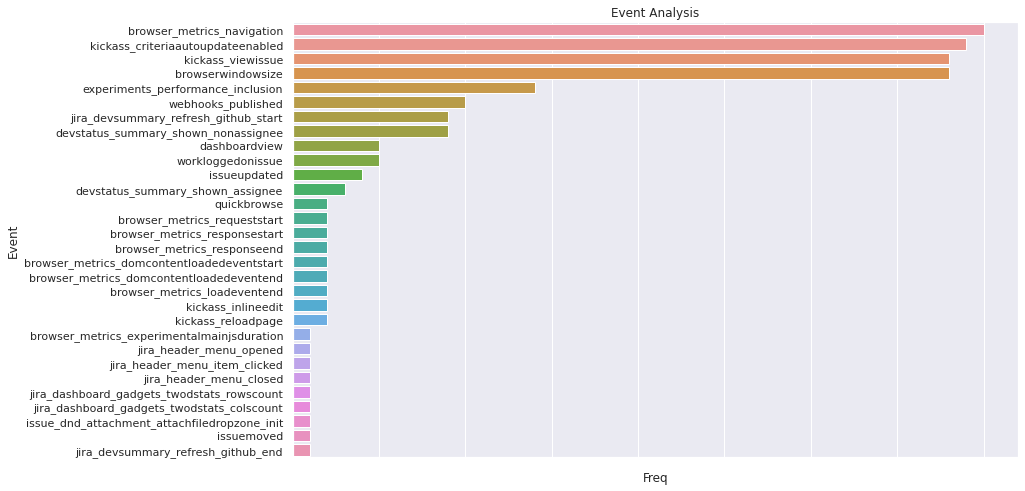

In [14]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 30

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(y="Event", x="Freq", data=unigrams_df[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=0)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Event Analysis')
plt.savefig('unigrams.png', bbox_inches='tight')

### Bi Grams

In [15]:
bigrams = get_ngrams(df['content'].tolist(), ngram_range=(2, 2))

Convert bigrams of both datasets to a dataframe with column names bi-gram and frequency.

In [16]:
bigrams_df = pd.DataFrame(bigrams)
bigrams_df.columns=["Bi-gram", "Freq"]

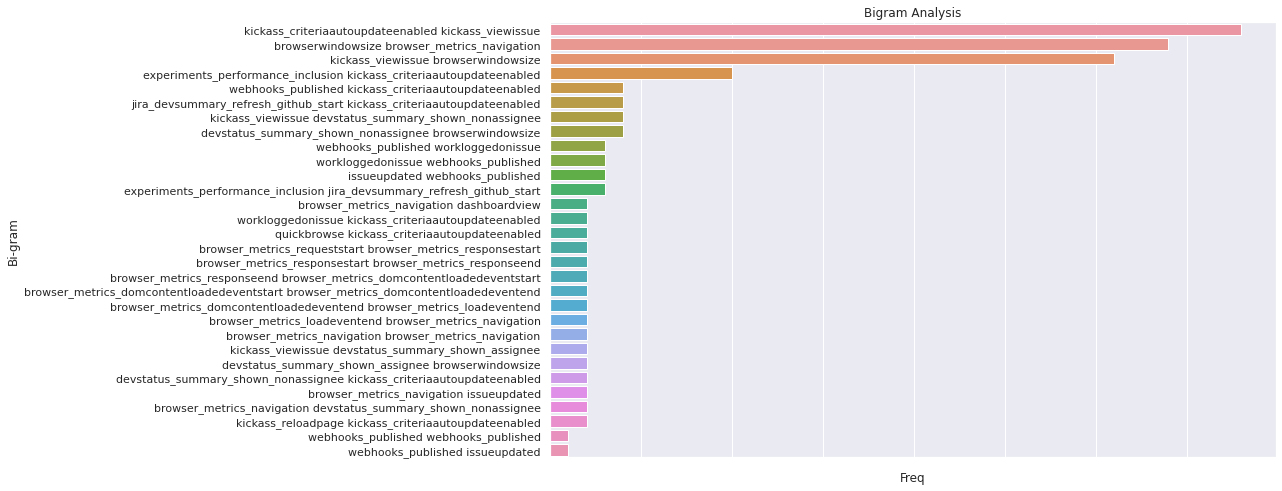

In [17]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 30

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(y="Bi-gram", x="Freq", data=bigrams_df[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=0)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Bigram Analysis')
plt.show()

### Trigrams

Let's now attempt trigrams. 

In [18]:
trigrams = get_ngrams(df['content'].tolist(), ngram_range=(3, 3))

Convert tri-grams of both datasets to a dataframe with column names tri-gram and frequency.

In [19]:
trigrams_df = pd.DataFrame(trigrams)
trigrams_df.columns=["Tri-gram", "Freq"]

In [20]:
trigrams_df[:20].to_csv('afsdsds.csv')

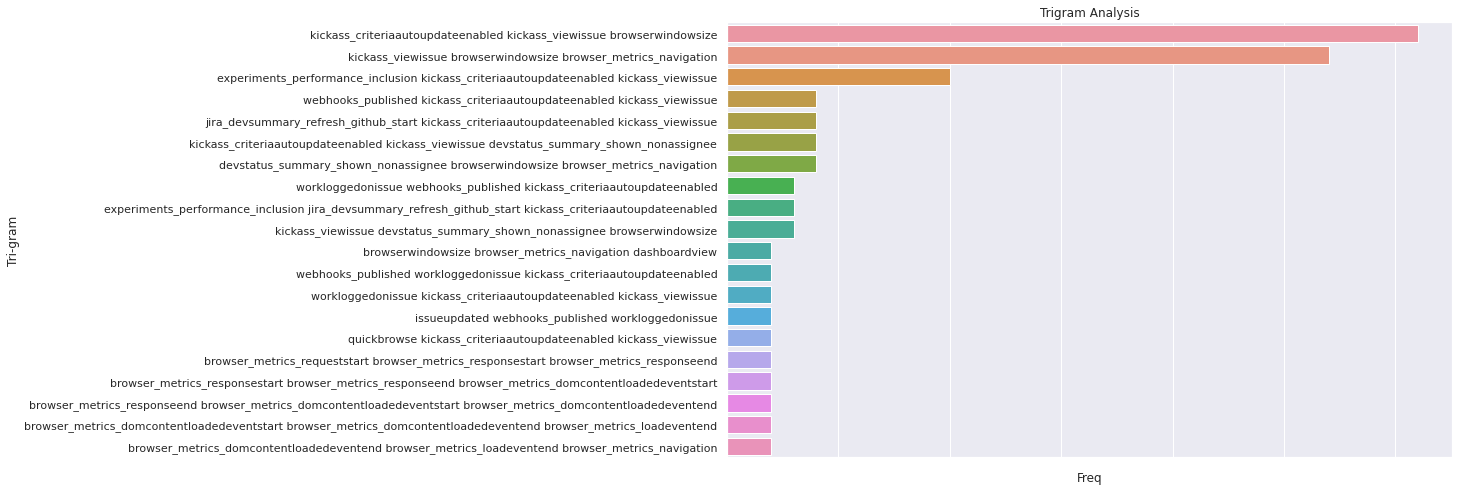

In [21]:
# Barplot of most freq Tri-grams
top_trigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(y="Tri-gram", x="Freq", data=trigrams_df[:top_trigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('Trigram Analysis')
plt.show()

## Topic Modeling

We will conduct a topic modeling for one of the event sequences.  
It is possible to conduct topic modeling using single words, bigrams, trigrams or n-grams.  
Will be using a topic modeling algorithm named - LDA (Latent Dirichlet Allocation) for this task. 

In [23]:
# Setting up the environment for LDA algorithm.

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


In [24]:
df_processed = df.copy()

Now we will create the text corpus.  


In [25]:
# Convert the tweets as the text corpus.
corpus = list(df_processed['content'])

In [26]:
corpus[:5]

['kickass_criteriaAutoUpdateEnabled kickass_viewIssue browserWindowSize browser_metrics_navigation',
 'kickass_criteriaAutoUpdateEnabled kickass_viewIssue browserWindowSize browser_metrics_navigation dashboardview',
 'webhooks_published workloggedonissue kickass_criteriaAutoUpdateEnabled kickass_viewIssue browserWindowSize browser_metrics_navigation',
 'workloggedonissue webhooks_published kickass_criteriaAutoUpdateEnabled kickass_viewIssue browserWindowSize browser_metrics_navigation',
 'webhooks_published webhooks_published issueupdated webhooks_published workloggedonissue kickass_criteriaAutoUpdateEnabled kickass_viewIssue browserWindowSize browser_metrics_navigation']

In [27]:
# Tokenization
t_texts = [[word for word in str(document).split()] for document in corpus]

In [ ]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(t_texts)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'events.dict'))

In [29]:
# Print the dictionary
print(dictionary.token2id)

{'browserWindowSize': 0, 'browser_metrics_navigation': 1, 'kickass_criteriaAutoUpdateEnabled': 2, 'kickass_viewIssue': 3, 'dashboardview': 4, 'webhooks_published': 5, 'workloggedonissue': 6, 'issueupdated': 7, 'quickbrowse': 8, 'browser_metrics_domContentLoadedEventEnd': 9, 'browser_metrics_domContentLoadedEventStart': 10, 'browser_metrics_loadEventEnd': 11, 'browser_metrics_requestStart': 12, 'browser_metrics_responseEnd': 13, 'browser_metrics_responseStart': 14, 'experiments_performance_inclusion': 15, 'browser_metrics_experimentalMainJsDuration': 16, 'jira_header_menu_closed': 17, 'jira_header_menu_item_clicked': 18, 'jira_header_menu_opened': 19, 'jira_dashboard_gadgets_twodstats_colscount': 20, 'jira_dashboard_gadgets_twodstats_rowscount': 21, 'issue_dnd_attachment_attachfiledropzone_init': 22, 'issuemoved': 23, 'jira_devsummary_refresh_github_start': 24, 'devstatus_summary_shown_assignee': 25, 'devstatus_summary_shown_nonassignee': 26, 'kickass_inlineEdit': 27, 'jira_devsummary_r

In [30]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in t_texts]

### Generate the topic model

In [31]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

2021-09-01 08:34:41,075 : INFO : collecting document frequencies
2021-09-01 08:34:41,079 : INFO : PROGRESS: processing document #0
2021-09-01 08:34:41,080 : INFO : calculating IDF weights for 37 documents and 29 features (224 matrix non-zeros)


In [32]:
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus] 

We need to define how many topics we capture through LDA.

In [33]:
total_topics = 20

Below code will build the LDA topic model.   
We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.



In [ ]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [35]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

[(0,
  '0.033*"experiments_performance_inclusion" + 0.033*"browser_metrics_navigation" + 0.033*"browserWindowSize" + 0.033*"jira_devsummary_refresh_github_start" + 0.033*"kickass_criteriaAutoUpdateEnabled" + 0.033*"kickass_viewIssue"'),
 (1,
  '0.033*"browser_metrics_navigation" + 0.033*"browserWindowSize" + 0.033*"jira_devsummary_refresh_github_start" + 0.033*"kickass_viewIssue" + 0.033*"kickass_criteriaAutoUpdateEnabled" + 0.033*"jira_dashboard_gadgets_twodstats_colscount"'),
 (2,
  '0.033*"kickass_viewIssue" + 0.033*"browserWindowSize" + 0.033*"browser_metrics_navigation" + 0.033*"kickass_criteriaAutoUpdateEnabled" + 0.033*"experiments_performance_inclusion" + 0.033*"issue_dnd_attachment_attachfiledropzone_init"'),
 (3,
  '0.033*"devstatus_summary_shown_nonassignee" + 0.033*"browser_metrics_navigation" + 0.033*"kickass_criteriaAutoUpdateEnabled" + 0.033*"kickass_viewIssue" + 0.033*"experiments_performance_inclusion" + 0.033*"browserWindowSize"'),
 (4,
  '0.192*"browser_metrics_navig

### Interactive topic analyzer

In [36]:
panel = gensimvis.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted t

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
10     -10.878068   10.538728       1        1  31.672315
15     -60.884026  -75.591820       2        1   9.817707
19      -2.336119  -53.289074       3        1   9.390128
17     -61.385319  -12.914634       4        1   5.537560
6      -28.737743  126.296997       5        1   5.020728
12       1.066606 -123.552811       6        1   3.374283
4       45.140720   -7.947869       7        1   2.671819
11    -140.795975  -98.530548       8        1   2.515459
16      61.531681  -83.240562       9        1   2.500000
8      -72.563057 -140.396881      10        1   2.500000
13      15.984491   63.578186      11        1   2.500000
14    -160.851624   68.945145      12        1   2.500000
18      85.961830   51.922935      13        1   2.500000
2      -99.020836  109.936348      14        1   2.500000
3     -176.764130   -8.681684      15        1   2.500000
1     -117.189880  -37.420200      16        1   2.500000
9      108.829918  -22.946203      17        1   2.500000
7       47.588097  121.934814      18        1   2.500000
5     -106.467834   30.176889      19        1   2.500000
0      -50.613804   59.328842      20        1   2.500000, topic_info=                                 Term      Freq  ...  logprob  loglift
1          browser_metrics_navigation  4.000000  ...  30.0000  30.0000
0                   browserWindowSize  4.000000  ...  29.0000  29.0000
2   kickass_criteriaAutoUpdateEnabled  4.000000  ...  28.0000  28.0000
3                   kickass_viewIssue  4.000000  ...  27.0000  27.0000
5                  webhooks_published  1.000000  ...  26.0000  26.0000
..                                ...       ...  ...      ...      ...
5                  webhooks_published  0.030833  ...  -3.4012  -0.3050
3                   kickass_viewIssue  0.030833  ...  -3.4012  -1.2765
0                   browserWindowSize  0.030833  ...  -3.4012  -1.2778
1          browser_metrics_navigation  0.030833  ...  -3.4012  -1.3185
2   kickass_criteriaAutoUpdateEnabled  0.030833  ...  -3.4012  -1.3449

[630 rows x 6 columns], token_table=      Topic      Freq                               Term
term                                                    
0         1  0.451887                  browserWindowSize
0         2  0.225943                  browserWindowSize
1         1  0.433854         browser_metrics_navigation
1         2  0.216927         browser_metrics_navigation
4         2  0.690555                      dashboardview
2         1  0.422540  kickass_criteriaAutoUpdateEnabled
2         2  0.211270  kickass_criteriaAutoUpdateEnabled
3         1  0.452467                  kickass_viewIssue
3         2  0.226233                  kickass_viewIssue
8         2  1.191629                        quickbrowse
5         1  0.597646                 webhooks_published
5         5  0.597646                 webhooks_published
6         1  0.833338                  workloggedonissue, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 16, 20, 18, 7, 13, 5, 12, 17, 9, 14, 15, 19, 3, 4, 2, 10, 8, 6, 1])